# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #Exploratary Plot
import matplotlib.pylab as plt
import joblib
from wordcloud import WordCloud,STOPWORDS


Read the dataset

In [11]:
df = pd.read_csv(r'C:\Users\LEGION\Desktop\MMU\Data Science Fundamental\Project\Prediction of Video\dataset\merged.csv')
df = df.drop(['Unnamed: 0'],axis=1)


Check the minimum and maximum data published of the videos in the dataset

In [12]:
print(df.publishedAt.min())
print(df.publishedAt.max())

2018-01-01 06:12:47+00:00
2023-06-07 00:00:13+00:00


In [13]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])


In [14]:
df['categoryId'].value_counts()

24    32962
20    27944
25    15570
28    12327
17    11928
22     9092
10     9037
27     7470
26     6239
15     4602
19     2879
2      2853
1      2696
23     1769
29      582
Name: categoryId, dtype: int64

Display the number of total unique category in the dataframe

In [15]:
df['categoryId'].nunique()

15

Display all the descriptive stats of the dataframe

In [18]:
desc_df = df.copy()
desc_df = desc_df.drop(['categoryId','dayOfWeek','daytime','trendingOrNot'],axis=1)
desc_df.describe()

,views,likes,comments,descriptionLength,duration,titleLength,sentimentScore,fullCapCount
count,1.479500e+05,1.479500e+05,1.474950e+05,147950.000000,147950.000000,147950.000000,147950.000000,147950.000000
mean,9.983592e+05,3.461655e+04,2.481217e+03,1059.282683,1511.068415,58.226414,0.021360,11.160128
std,6.021688e+06,1.916706e+05,3.512632e+04,905.895033,6634.116178,20.962490,0.339348,9.129885
min,3.000000e+00,1.000000e+00,0.000000e+00,2.000000,1.000000,1.000000,-0.971100,0.000000
25%,1.383000e+04,2.310000e+02,1.800000e+01,423.000000,148.000000,42.000000,0.000000,6.000000
50%,8.517050e+04,1.635000e+03,1.670000e+02,820.000000,403.000000,57.000000,0.000000,9.000000
75%,5.745192e+05,1.468000e+04,1.192000e+03,1406.000000,818.000000,74.000000,0.051600,13.000000
max,5.651303e+08,1.602153e+07,6.738537e+06,5000.000000,485620.000000,114.000000,0.964600,86.000000


Top 5 video amount published on each year.

Text(0, 0.5, 'Video Counts')

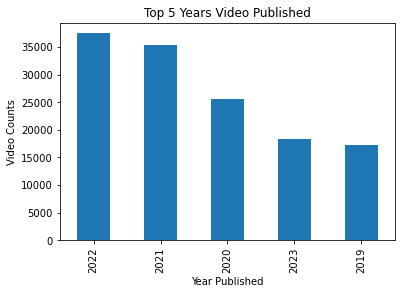

In [22]:
ax = df['publishedAt'].dt.strftime("%Y")\
.value_counts().head()\
.plot(kind='bar',title='Top 5 Years Video Published')
ax.set_xlabel('Year Published')
ax.set_ylabel('Video Counts')

Video amounts published on each day

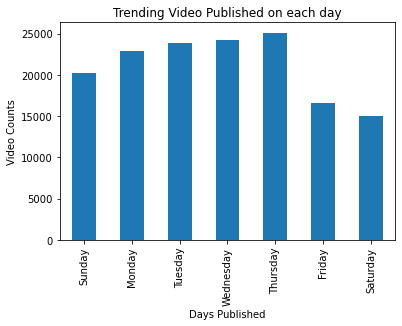

In [23]:
# Use the map() method of the pandas Series object to convert the numerical variable to the day name
day_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
# Create the bar chart with the day labels
ax = df['dayOfWeek'].value_counts().sort_index().plot(kind='bar', title='Trending Video Published on each day')

# Set the x-axis tick labels to the day names
ax.set_xticklabels(day_dict.values())

# Set the x and y axis labels
ax.set_xlabel('Days Published')
ax.set_ylabel('Video Counts')

# Show the chart
plt.show()

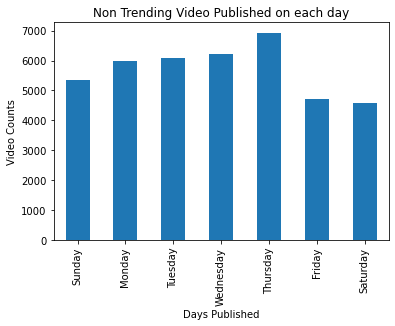

In [28]:
# Use the map() method of the pandas Series object to convert the numerical variable to the day name
day_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

dayofWeeks = df.loc[df['trendingOrNot'] == 1, 'dayOfWeek']
# Create the bar chart with the day labels
ax = dayofWeeks.value_counts().sort_index().plot(kind='bar', title='Non Trending Video Published on each day')

# Set the x-axis tick labels to the day names
ax.set_xticklabels(day_dict.values())

# Set the x and y axis labels
ax.set_xlabel('Days Published')
ax.set_ylabel('Video Counts')

# Show the chart
plt.show()

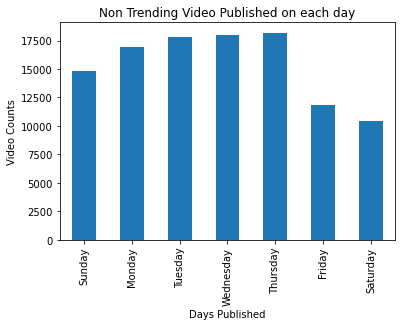

In [29]:
# Use the map() method of the pandas Series object to convert the numerical variable to the day name
day_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

dayofWeeks = df.loc[df['trendingOrNot'] == 0, 'dayOfWeek']
# Create the bar chart with the day labels
ax = dayofWeeks.value_counts().sort_index().plot(kind='bar', title='Non Trending Video Published on each day')

# Set the x-axis tick labels to the day names
ax.set_xticklabels(day_dict.values())

# Set the x and y axis labels
ax.set_xlabel('Days Published')
ax.set_ylabel('Video Counts')

# Show the chart
plt.show()

Video amounts published on day time

Text(0, 0.5, 'Video Counts')

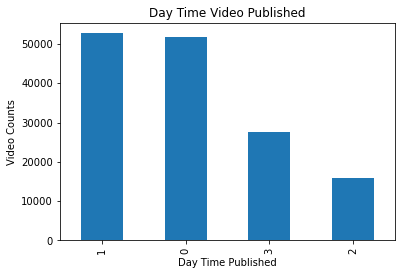

In [40]:
ax = df['daytime'].value_counts()\
.plot(kind='bar',title='Day Time Video Published')
ax.set_xlabel('Day Time Published')
ax.set_ylabel('Video Counts')

Text(0, 0.5, 'Video Counts')

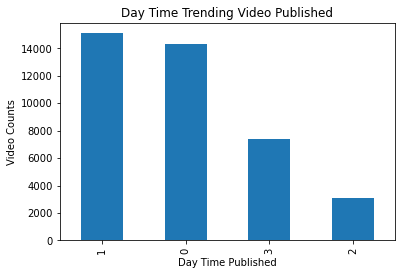

In [41]:
daytimes = df.loc[df['trendingOrNot'] == 1, 'daytime']

ax = daytimes.value_counts()\
.plot(kind='bar',title='Day Time Trending Video Published')
ax.set_xlabel('Day Time Published')
ax.set_ylabel('Video Counts')

Text(0, 0.5, 'Video Counts')

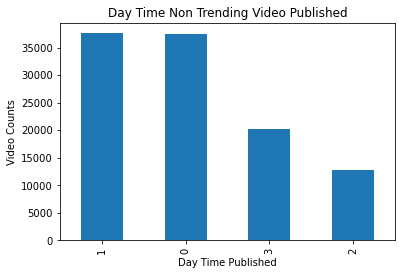

In [42]:
daytimes = df.loc[df['trendingOrNot'] == 0, 'daytime']

ax = daytimes.value_counts()\
.plot(kind='bar',title='Day Time Non Trending Video Published')
ax.set_xlabel('Day Time Published')
ax.set_ylabel('Video Counts')

Top 10 video amounts on each channel

Text(0, 0.5, 'Video Counts')

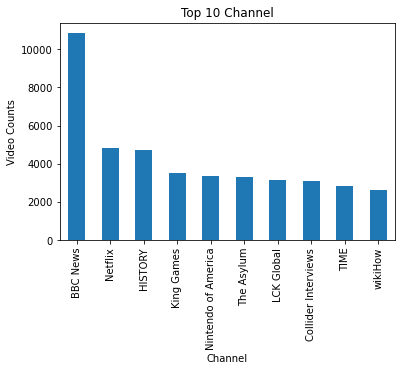

In [43]:
ax = df['channelTitle']\
.value_counts().head(10)\
.plot(kind='bar',title='Top 10 Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Video Counts')

Text(0, 0.5, 'Video Counts')

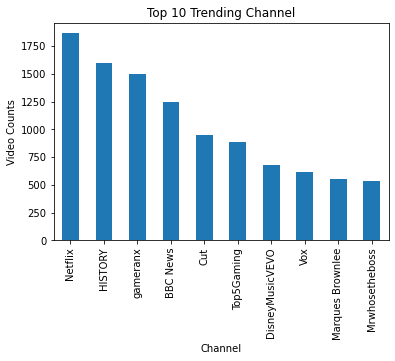

In [45]:
trendingChannel = df.loc[df['trendingOrNot'] == 1, 'channelTitle']
ax = trendingChannel\
.value_counts().head(10)\
.plot(kind='bar',title='Top 10 Trending Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Video Counts')

Text(0, 0.5, 'Video Counts')

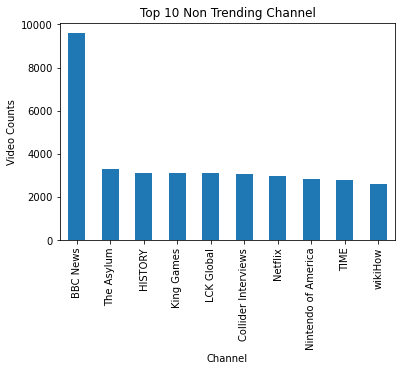

In [46]:
trendingChannel = df.loc[df['trendingOrNot'] == 0, 'channelTitle']
ax = trendingChannel\
.value_counts().head(10)\
.plot(kind='bar',title='Top 10 Non Trending Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Video Counts')

Top 10 Most Viewed Video

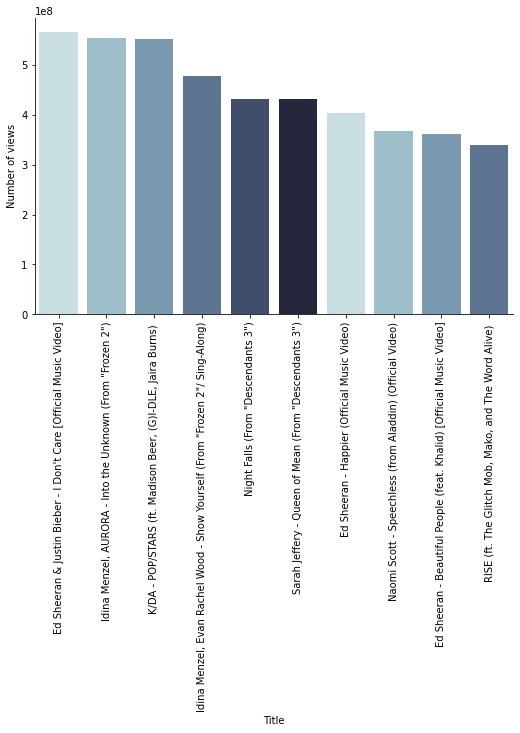

In [47]:
top10viewed = df[df['views'] == df['views']].sort_values(by=['views'],ascending=False).head(10)
top10viewed.title=top10viewed.title.str.split(pat='|').apply(lambda x: x[0])
sns.catplot(data=top10viewed, x='title', y='views',kind='bar',palette = sns.cubehelix_palette(rot=-.2) ,ci=None, legend_out=False,aspect =2)

plt.ylabel('Number of views')
plt.xlabel('Title')
plt.xticks(rotation=90)
plt.show()

Video amount of each category

In [48]:
# Get Category Name For Each Category ID 
import json
with open(r'C:\Users\LEGION\Desktop\MMU\Data Science Fundamental\Project\Prediction of Video\dataset\US_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
category=[]
for cat in categories:
    category.append([cat["id"],cat["snippet"]["title"]])

In [49]:
pd.options.display.max_rows = 13000
df_category =pd.DataFrame(category,columns=['categoryId','category']) 
df_category.categoryId=df_category.categoryId.astype('int64')
df_merge = df.merge(df_category, on = 'categoryId', how = 'inner')
df_merge['category']


0                 Howto & Style
1                 Howto & Style
2                 Howto & Style
3                 Howto & Style
4                 Howto & Style
                  ...          
147945    Nonprofits & Activism
147946    Nonprofits & Activism
147947    Nonprofits & Activism
147948    Nonprofits & Activism
147949    Nonprofits & Activism
Name: category, Length: 147950, dtype: object

Top 5 Most Common Category ID

<AxesSubplot:xlabel='category'>

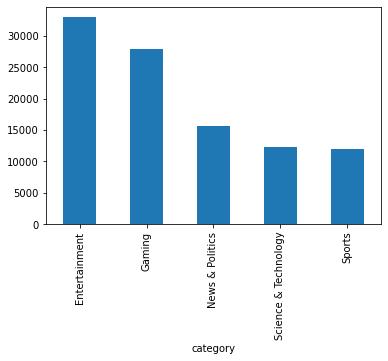

In [50]:
df_merge.groupby(df_merge['category']).size().sort_values(ascending=False).head(5).plot(kind='bar')

Text(0, 0.5, 'Video Counts')

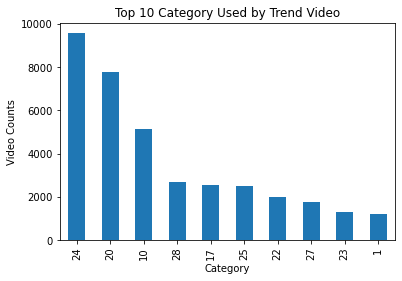

In [52]:
#Most trends video category
category = df.loc[df['trendingOrNot'] == 1, 'categoryId']

ax = category.value_counts().head(10)\
.plot(kind='bar',title='Top 10 Category Used by Trend Video')
ax.set_xlabel('Category')
ax.set_ylabel('Video Counts')

Text(0, 0.5, 'Video Counts')

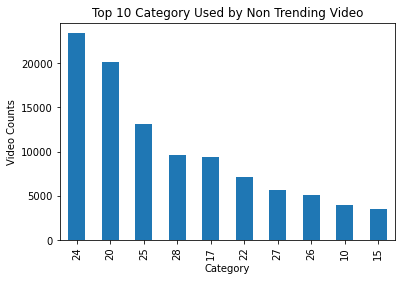

In [51]:
#Most trends video category
category = df.loc[df['trendingOrNot'] == 0, 'categoryId']

ax = category.value_counts().head(10)\
.plot(kind='bar',title='Top 10 Category Used by Non Trending Video')
ax.set_xlabel('Category')
ax.set_ylabel('Video Counts')

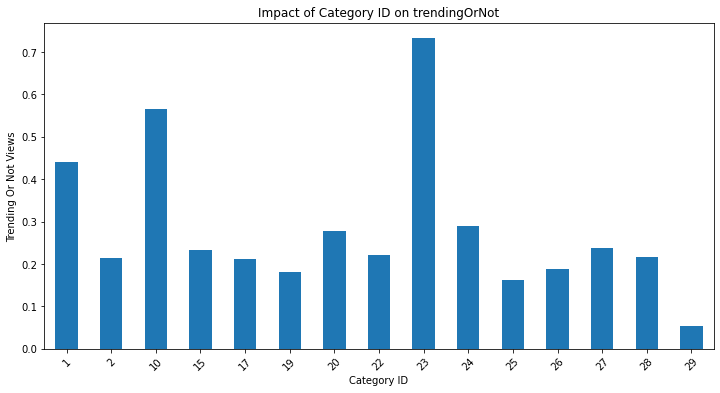

In [54]:
# Calculate the mean of 'trendingOrNot' for each category
category_means = df.groupby('categoryId')['trendingOrNot'].mean()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
category_means.plot(kind='bar')
plt.xlabel('Category ID')
plt.ylabel('Trending Or Not Views')
plt.title('Impact of Category ID on trendingOrNot')
plt.xticks(rotation=45)
plt.show()

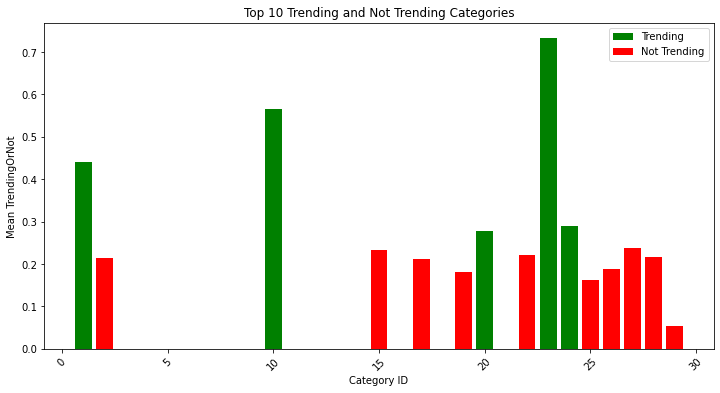

In [55]:
# Calculate the mean of 'trendingOrNot' for each category
category_means = df.groupby('categoryId')['trendingOrNot'].mean()

# Sort the categories based on the mean value
sorted_categories = category_means.sort_values(ascending=False)

# Separate the top 10 trending and non-trending categories
top_10_trending = sorted_categories.head(10)
top_10_not_trending = sorted_categories.tail(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_trending.index, top_10_trending, label='Trending', color='green')
plt.bar(top_10_not_trending.index, top_10_not_trending, label='Not Trending', color='red')
plt.xlabel('Category ID')
plt.ylabel('Mean TrendingOrNot')
plt.title('Top 10 Trending and Not Trending Categories')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The thumbnail of the most viewed video

In [56]:
from IPython.display import HTML, display
most_views_thumb = df['thumbnailLink'].head(100).reset_index()['thumbnailLink']

ROW = 10
COLUMN = 10
tempHTML = ''
innerHTML = '<div style="block">'
    
for r in range(ROW):
    rowHTML = ''
    for c in range(COLUMN):
        tempHTML = '<img src="' + most_views_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
        rowHTML += tempHTML
    innerHTML += rowHTML #'<div>' +rowHTML + '</div>'
innerHTML += '</div>'
display(HTML(innerHTML))

Most common video title

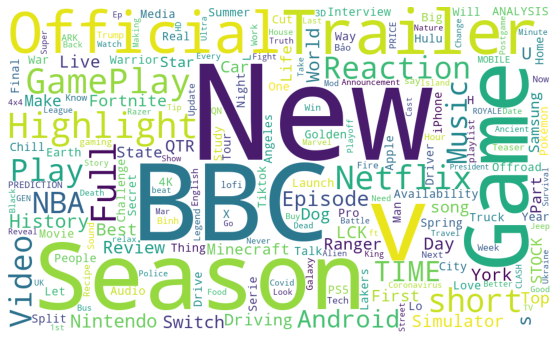

In [60]:
text = ' '.join(df['title'])
wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False,
                      background_color='white',height=600,width=1000)\
                     .generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

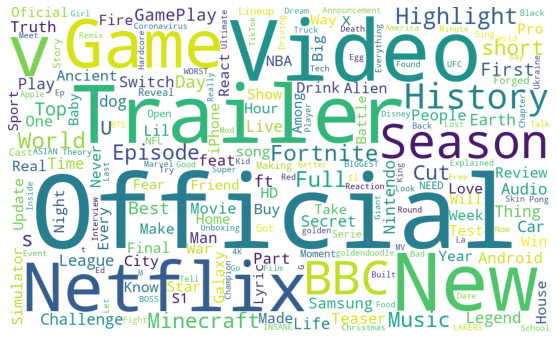

In [61]:
#WordCloud (For Trending Video)

titles = df.loc[df['trendingOrNot'] == 1, 'title']
text = ' '.join(titles)
wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False,
                      background_color='white',height=600,width=1000)\
                     .generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

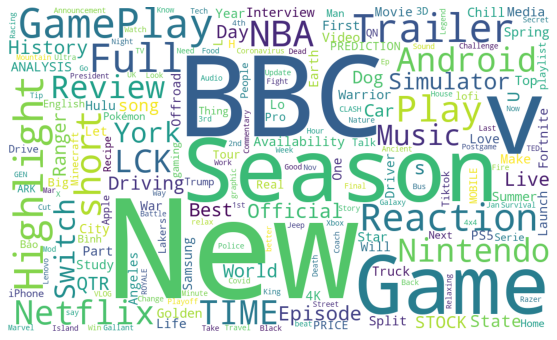

In [62]:
#WordCloud (For Non Trend)

from wordcloud import WordCloud,STOPWORDS

titles = df.loc[df['trendingOrNot'] == 0, 'title']
text = ' '.join(titles)
wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False,
                      background_color='white',height=600,width=1000)\
                     .generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

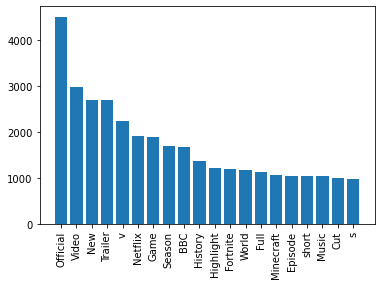

In [63]:
titles = df.loc[df['trendingOrNot'] == 1, 'title']
text = ' '.join(titles)
wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False,
                      background_color='white',height=600,width=1000)
wordcloud.generate(text)

word_freq = wordcloud.process_text(text)
sorted_word_freq = {k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)}
top_10_words = dict(list(sorted_word_freq.items())[:20])

plt.bar(top_10_words.keys(), top_10_words.values())
plt.xticks(rotation=90)
plt.show()

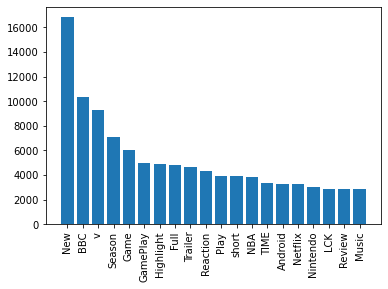

In [64]:
from wordcloud import WordCloud, STOPWORDS
titles = df.loc[df['trendingOrNot'] == 0, 'title']
text = ' '.join(titles)
wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False,
                      background_color='white',height=600,width=1000)
wordcloud.generate(text)

word_freq = wordcloud.process_text(text)
sorted_word_freq = {k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)}
top_10_words = dict(list(sorted_word_freq.items())[:20])

plt.bar(top_10_words.keys(), top_10_words.values())
plt.xticks(rotation=90)
plt.show()

## Relationship between variables

c:\Users\LEGION\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


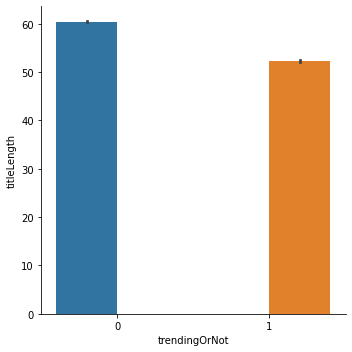

In [67]:
sns.factorplot(x ='trendingOrNot', y ='titleLength', 
               kind = 'bar', hue = 'trendingOrNot', 
               data = df)

c:\Users\LEGION\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Count')

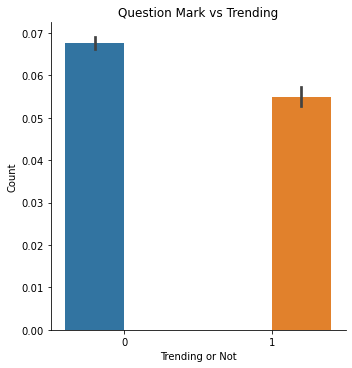

In [68]:
sns.factorplot(x ='trendingOrNot', y ='questionMark', 
               kind = 'bar', hue = 'trendingOrNot', 
               data = df)
plt.title('Question Mark vs Trending')
plt.xlabel('Trending or Not')
plt.ylabel('Count')

c:\Users\LEGION\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Count')

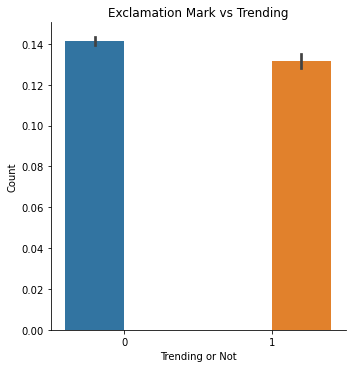

In [69]:
sns.factorplot(x ='trendingOrNot', y ='exclamationMark', 
               kind = 'bar', hue = 'trendingOrNot', 
               data = df)
plt.title('Exclamation Mark vs Trending')
plt.xlabel('Trending or Not')
plt.ylabel('Count')

c:\Users\LEGION\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-5.950000000000003, 0.5, 'Count')

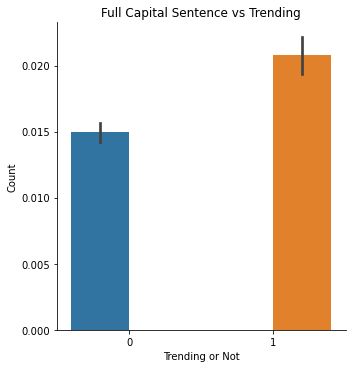

In [70]:
sns.factorplot(x ='trendingOrNot', y ='fullCapSentence', 
               kind = 'bar', hue = 'trendingOrNot', 
               data = df)
plt.title('Full Capital Sentence vs Trending')
plt.xlabel('Trending or Not')
plt.ylabel('Count')

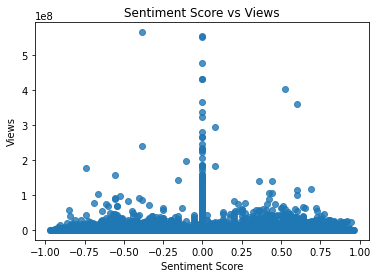

In [71]:
sns.regplot(x='sentimentScore', y='views', data=df)
plt.title('Sentiment Score vs Views')
plt.xlabel('Sentiment Score')
plt.ylabel('Views')
plt.show()

<AxesSubplot:xlabel='views', ylabel='likes'>

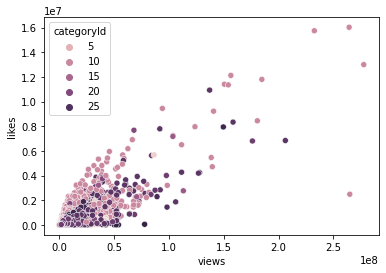

In [31]:
sns.scatterplot(x='views',y='likes',hue='categoryId',data=df)

Relation between views and comments

<AxesSubplot:xlabel='views', ylabel='comments'>

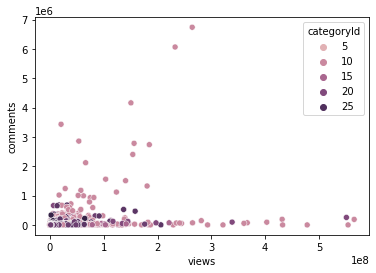

In [37]:
sns.scatterplot(x='views',y='comments',hue='categoryId',data=df)

Relation between likes and comments

<AxesSubplot:xlabel='likes', ylabel='comments'>

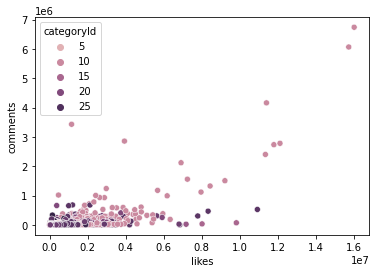

In [39]:
sns.scatterplot(x='likes',y='comments',hue='categoryId',data=df)

<AxesSubplot:xlabel='views', ylabel='duration'>

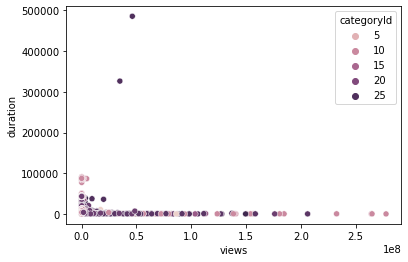

In [12]:
sns.scatterplot(x='views',y='duration',hue='categoryId',data=df)

In [73]:
cols = ['views','comments','likes','duration', 'titleLength','descriptionLength' ,'sentimentScore', 'fullCapCount']
corr_matrix = df[cols].corr()

corr_matrix

,views,comments,likes,duration,titleLength,descriptionLength,sentimentScore,fullCapCount
views,1.000000,0.333016,0.663175,-0.016283,-0.050886,0.026010,-0.002206,-0.016413
comments,0.333016,1.000000,0.643946,-0.010093,-0.038337,0.009668,-0.003130,-0.007431
likes,0.663175,0.643946,1.000000,-0.026086,-0.096848,0.004153,-0.000130,-0.024384
duration,-0.016283,-0.010093,-0.026086,1.000000,0.101206,0.116516,0.089974,-0.008503
titleLength,-0.050886,-0.038337,-0.096848,0.101206,1.000000,0.174396,0.001314,0.316695
descriptionLength,0.026010,0.009668,0.004153,0.116516,0.174396,1.000000,0.028550,0.135798
sentimentScore,-0.002206,-0.003130,-0.000130,0.089974,0.001314,0.028550,1.000000,0.009153
fullCapCount,-0.016413,-0.007431,-0.024384,-0.008503,0.316695,0.135798,0.009153,1.000000


<AxesSubplot:>

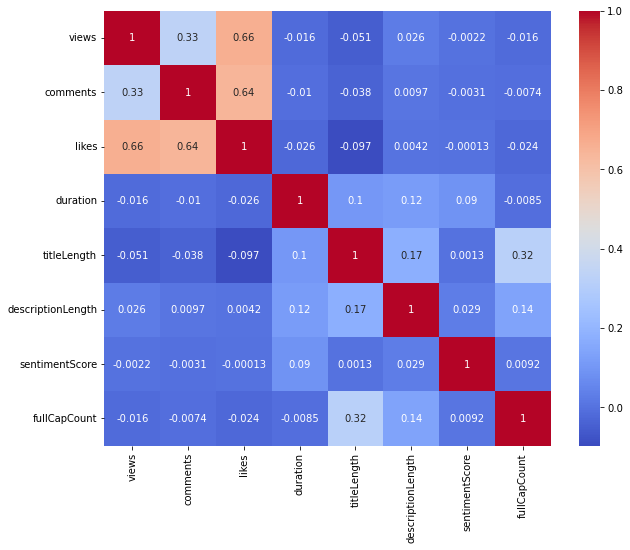

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',ax=ax)

# Explore Model Trained

In [78]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))  # set of English stop words
lemmatizer = WordNetLemmatizer()
def preprocess(text,target_language='en'):
    if not isinstance(text, str):
        try:
            text = str(text)
        except:
            raise TypeError('Input must be a string or a float')     
    # convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text) 
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Removing repeated characters
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words]
    words = [w for w in words if not w in stop_words]
    return words

# Applying preprocessing function to title column
df['cleanTitle'] = df['title'].apply(preprocess)
df['cleanTitle'] = df['cleanTitle'].apply(lambda x: ' '.join(x))


In [76]:
model = joblib.load(r'C:\Users\LEGION\Desktop\MMU\Data Science Fundamental\Project\Prediction of Video\85pct(2).pkl')

In [79]:
testing_X = df[['cleanTitle','titleLength', 'categoryId','duration']]
# Predict the probabilities for each video being trending
predicted_probs = model.predict_proba(testing_X)[:, 1]

# Create a new DataFrame with the category_id and predicted_prob columns
predictions = pd.DataFrame({
    'category_id': testing_X['categoryId'],
    'titleLength' : testing_X['titleLength'],
    'duration': testing_X['duration'],
    'predicted_prob': predicted_probs
})

In [80]:
# Group the videos by category_id and calculate the mean predicted probability for each category
category_probs = predictions.groupby('category_id')['predicted_prob'].mean()

# Sort the category_ids based on the mean predicted probabilities in descending order
top_trending = category_probs.sort_values(ascending=False).head(10)
top_not_trending = category_probs.sort_values().head(10)
print(top_trending)
print(top_not_trending)

category_id
23    0.760977
10    0.606903
1     0.487370
24    0.335099
20    0.312995
27    0.296764
15    0.278317
28    0.260223
22    0.252409
2     0.246497
Name: predicted_prob, dtype: float64
category_id
29    0.102320
25    0.186451
26    0.218126
19    0.222963
17    0.224555
2     0.246497
22    0.252409
28    0.260223
15    0.278317
27    0.296764
Name: predicted_prob, dtype: float64


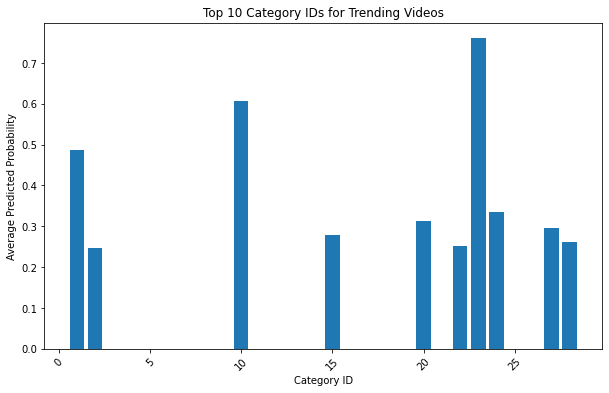

In [81]:
# Create a bar plot for the top trending category_ids
plt.figure(figsize=(10, 6))
plt.bar(top_trending.index, top_trending.values)
plt.xlabel('Category ID')
plt.ylabel('Average Predicted Probability')
plt.title('Top 10 Category IDs for Trending Videos')
plt.xticks(rotation=45)
plt.show()

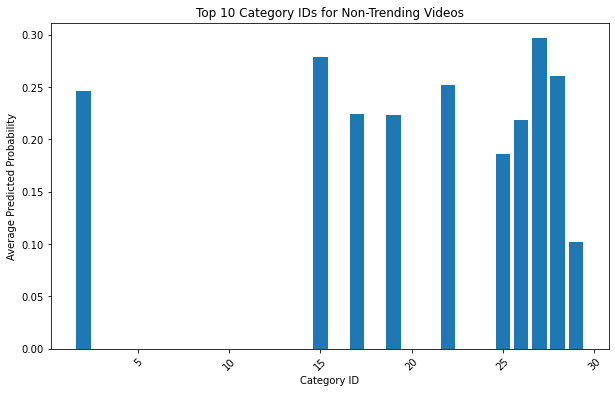

In [82]:
# Create a bar plot for the top non-trending category_ids
plt.figure(figsize=(10, 6))
plt.bar(top_not_trending.index, top_not_trending.values)
plt.xlabel('Category ID')
plt.ylabel('Average Predicted Probability')
plt.title('Top 10 Category IDs for Non-Trending Videos')
plt.xticks(rotation=45)
plt.show()

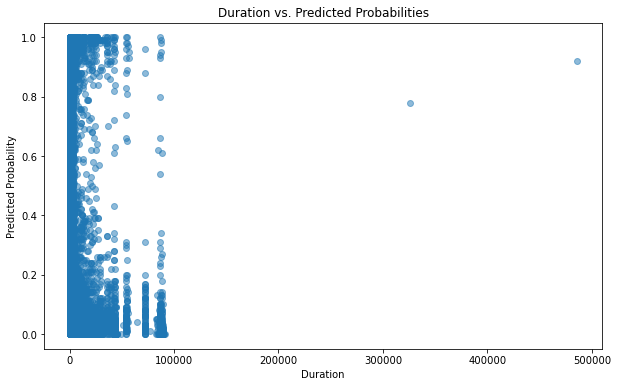

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions['duration'], predictions['predicted_prob'], alpha=0.5)
plt.xlabel('Duration')
plt.ylabel('Predicted Probability')
plt.title('Duration vs. Predicted Probabilities')
plt.show()

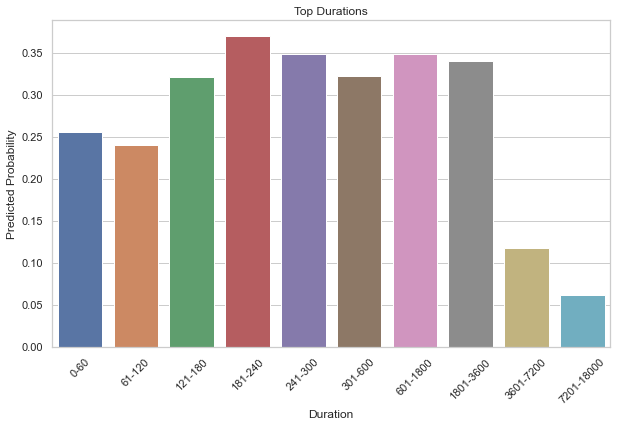

NameError: name 'st' is not defined

In [85]:
# Define the duration ranges (1min, 1-2min, 2min-3min,3-4min,4min-5min, 5-10min,10min-30min,30min-60min,60min-120min,120min-300min)
duration_ranges = [(0, 60), (61, 120),(121,180), (181, 240),(241,300), (301,600),(601, 1800), (1801, 3600), (3601, 7200),(7201,18000)]

# Map the duration values to their respective ranges
predictions['duration_range'] = pd.cut(predictions['duration'], bins=[r[0] for r in duration_ranges] + [duration_ranges[-1][1]], labels=[f"{r[0]}-{r[1]}" for r in duration_ranges])

# Calculate the average predicted_prob for each duration range
average_probs = predictions.groupby('duration_range')['predicted_prob'].mean().reset_index()

# Sort the average_probs DataFrame by predicted_prob in descending order
average_probs_sorted = average_probs.sort_values('predicted_prob', ascending=False)

# Get the top 3 duration ranges with the highest average predicted_prob
top_10_ranges = average_probs_sorted

sns.set(style='whitegrid')
    # Plot the graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='duration_range', y='predicted_prob',data=top_10_ranges)
plt.xlabel('Duration')
plt.ylabel('Predicted Probability')
plt.title('Top Durations')
plt.xticks(rotation=45)
plt.show()
st.pyplot(plt)

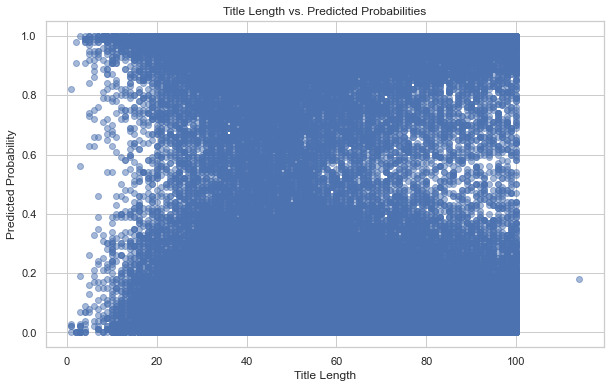

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions['titleLength'], predictions['predicted_prob'], alpha=0.5)
plt.xlabel('Title Length')
plt.ylabel('Predicted Probability')
plt.title('Title Length vs. Predicted Probabilities')
plt.show()

In [87]:
# Sort the predictions DataFrame by predicted_prob in descending order
predictions_sorted = predictions.sort_values('predicted_prob', ascending=False)
predictions_sorted = predictions_sorted.drop(['category_id','duration'],axis=1)
# Group the data by title length and calculate the mean predicted probability for each range
predictions_grouped = predictions_sorted.groupby(pd.cut(predictions_sorted['titleLength'], bins=10)).mean()

# Sort the grouped data by predicted_prob in descending order
predictions_grouped_sorted = predictions_grouped.sort_values('predicted_prob', ascending=False)

# Display the top 5 best ranges for title length
top_titleLength = predictions_grouped_sorted.head(10)
# # Round up the values in the "titleLength" column
# top_titleLength['titleLength'] = np.ceil(top_titleLength['titleLength'])
top_titleLength.head(10)

,titleLength,predicted_prob
titleLength,,
"(0.887, 12.3]",9.328215,0.456724
"(34.9, 46.2]",40.826994,0.421887
"(23.6, 34.9]",29.640647,0.409818
"(12.3, 23.6]",19.561616,0.371493
"(46.2, 57.5]",51.830410,0.344221
"(57.5, 68.8]",62.832303,0.260736
"(68.8, 80.1]",74.156224,0.225532
"(80.1, 91.4]",85.857321,0.185796
"(102.7, 114.0]",114.000000,0.180000


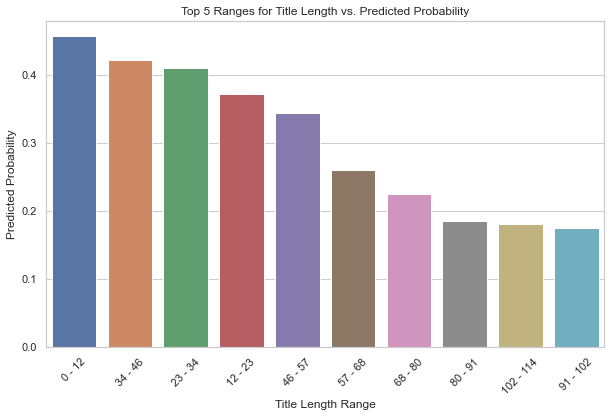

In [88]:
# Extract the range and predicted_prob columns from the DataFrame
ranges = top_titleLength.index
predicted_probs = top_titleLength['predicted_prob']
rounded_ranges = [f"{int(range_val.left)} - {int(range_val.right)}" for range_val in ranges]
# Set the style of the plot
sns.set(style='whitegrid')

# Plot the graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=rounded_ranges, y=predicted_probs)
plt.xlabel('Title Length Range')
plt.ylabel('Predicted Probability')
plt.title('Top 5 Ranges for Title Length vs. Predicted Probability')
plt.xticks(rotation=45)
plt.show()

Feature: gameplay	Importance Score: 0.004932490360611684
Feature: trailer	Importance Score: 0.005233614225850292
Feature: video	Importance Score: 0.0062958212662216455
Feature: bbc	Importance Score: 0.006929431947494608
Feature: news	Importance Score: 0.006958651280864053
Feature: reaction	Importance Score: 0.007692411963034501
Feature: official	Importance Score: 0.011068872107738452


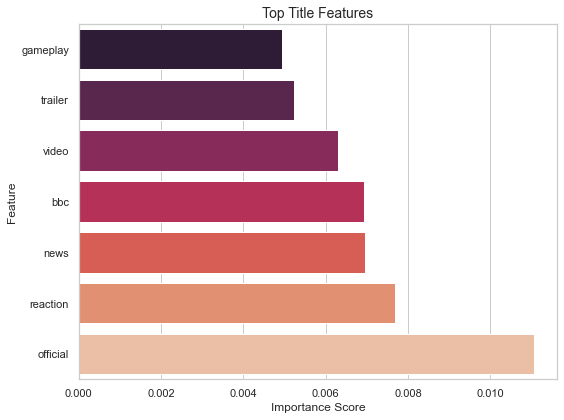

In [89]:

# Define the number of top cleanTitle to display
N = 10  # Replace with your desired value

# Get the feature importance scores from the trained RandomForestClassifier
feature_importances = model.named_steps['classifier'].feature_importances_

# Get the index of the 'cleanTitle' feature in the column transformer
clean_title_index = model.named_steps['preprocessor'].transformers_[0][2].index('cleanTitle')

# Get the feature names from the column transformer
feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()

# Get the indices of the top N feature importance scores
top_n_indices = np.argsort(feature_importances)[-N:]

# Initialize lists to store the top feature names and importance scores
top_n_features = []
top_n_scores = []
# Display the top N cleanTitle and their importance scores
for index in top_n_indices:
    if index == clean_title_index and index < len(feature_names):
        top_n_features.append(feature_names[index])
        top_n_scores.append(feature_importances[index])
        print(f"CleanTitle: {feature_names[index]}\tImportance Score: {feature_importances[index]}")
    elif index < len(feature_names):
        top_n_features.append(feature_names[index])
        top_n_scores.append(feature_importances[index])
        print(f"Feature: {feature_names[index]}\tImportance Score: {feature_importances[index]}")

# Create a DataFrame from the top features and scores
top_features_df = pd.DataFrame({'Feature': top_n_features, 'Importance Score': top_n_scores})
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance Score', y='Feature', data=top_features_df, palette="rocket")
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top Title Features', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\LEGION\AppData\Local\Temp\ipykernel_29704\4145637740.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Predicted Probability')


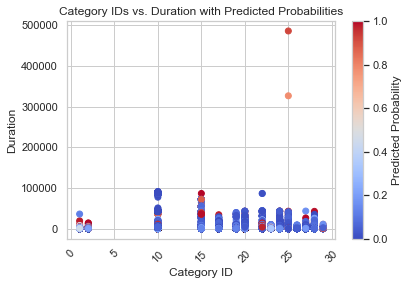

In [90]:
# Create a new DataFrame with the category_id, duration, and predicted_prob columns
plt.scatter(predictions['category_id'], predictions['duration'], c=predictions['predicted_prob'], cmap='coolwarm')
plt.colorbar(label='Predicted Probability')
plt.xlabel('Category ID')
plt.ylabel('Duration')
plt.title('Category IDs vs. Duration with Predicted Probabilities')
plt.xticks(rotation=45)
plt.show()

Save all the data for deployment used

In [ ]:
top_trending.to_csv('topCategory.csv')
top_10_ranges.to_csv('topDuration.csv')
top_titleLength.to_csv('topTitleLength.csv')
top_features_df.to_csv('topTitle.csv')